# Homework 2, Python Part, Paul Steller

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
from statistics import mean
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from sklearn.linear_model import Lasso

## 3) Recall from the first problem set that $\hat{\beta}_{ridge}=(X^TX+\alpha I)^{-1}X^Ty$. Use Python to numerically verify the solution computed in Problem (1) in the special case $X=1_{1 \times p}, y=1$, for some values of p.

In [145]:
for p in [1,5,10]:
    X = np.ones((1,p))
    y = 1
    alpha = 0.5
    B_ridge_soln = np.dot(inv(np.dot(X.transpose(), X) + alpha * np.identity(p)), np.dot(X.transpose(), y))
    problem_1_soln = (1/(alpha + p))* np.ones((1,p))
    print('for p =',p)
    print('the solution using Bridge is', B_ridge_soln)
    print('the solution using 1/(alpha + p) 1 is ',problem_1_soln.transpose())
    #print(B_ridge_soln == problem_1_soln.transpose())

for p = 1
the solution using Bridge is [[0.66666667]]
the solution using 1/(alpha + p) 1 is  [[0.66666667]]
for p = 5
the solution using Bridge is [[0.18181818]
 [0.18181818]
 [0.18181818]
 [0.18181818]
 [0.18181818]]
the solution using 1/(alpha + p) 1 is  [[0.18181818]
 [0.18181818]
 [0.18181818]
 [0.18181818]
 [0.18181818]]
for p = 10
the solution using Bridge is [[0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]]
the solution using 1/(alpha + p) 1 is  [[0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]
 [0.0952381]]


#### So we have equality between the two solutions

## 4)

### (a) Implement the coordinate descent algorithm discussed in class to compute the Lasso Solution

In [459]:
from numpy.linalg import norm

def lasso_by_hand(X,y, alpha = 0.5, tol = 0.00001):
    X = pd.DataFrame(X)
    #X[len(X.columns)]=np.ones(len(X)) #the intercept column
    beta = np.ones((len(X.columns),1))
    beta = pd.DataFrame(beta)
    tolerance = (tol+1)*np.ones((len(X.columns),1))
    alpha2 = alpha*(len(X.transpose().columns))
    while np.any(np.array(tolerance) > np.array(tol*np.ones((len(X.columns),1)))):
        test_beta = beta.copy()
        tolerance = np.empty((len(X.columns),1))
        for i in range(len(X.columns)):
            x = []
            epsilon = []
            x = (X.iloc[:,i].transpose().dot(y) - X.iloc[:,i].transpose().dot(X.drop(columns=[i]).dot(beta.drop([i]))))/(X.iloc[:,i].transpose().dot(X.iloc[:,i]))
            epsilon = alpha2/(np.linalg.norm(X.iloc[:,i],ord = 2)**2)
            beta.iloc[i]= np.sign(x)*np.maximum(np.abs(x)-epsilon,0)
        tolerance = np.abs(beta - test_beta)
    solution = np.array(beta)
    solution.reshape(1,len(X.columns))
    return solution
    print(solution)

## (b) To confirm your implementation is correct, generate random data and compare the answer you get with your code with the lasso solution computed using $\texttt{scikit-learn}$. (NOTE: Recall that the Lasso function in $\texttt{scikit-learn}$ solves a slightly different problem.)

In [462]:
n = 100
p = 10
X = np.random.randn(n,p)
epsilon = np.random.randn(n,1)
beta = np.random.rand(p)
beta = beta.reshape(len(beta),1)
y = X.dot(beta)+epsilon



clf = Lasso(alpha = 0.5, fit_intercept = False)
clf.fit(X,y)
print('coefficients from scikit-learn:', clf.coef_.reshape(p,1)) 
#print('y-intercept from scikit-learn:', clf.intercept_)
solution = lasso_by_hand(X,y)
print('solution from my implementation of the algorithm:', solution)


#print('coefficients from my implementation of the algorithm:', solution[0:-1])
#print('y-intercept from my implementation:', solution[-1])
print('the difference between the two solutions:', clf.coef_.reshape(p,1) - solution)



coefficients from scikit-learn: [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.82079529]
 [ 0.30276413]
 [ 0.        ]
 [-0.        ]
 [ 0.83395501]
 [ 0.41383987]
 [ 0.45492893]]
solution from my implementation of the algorithm: [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.82079277]
 [ 0.30276244]
 [ 0.        ]
 [-0.        ]
 [ 0.83395511]
 [ 0.41383954]
 [ 0.45492925]]
the difference between the two solutions: [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.51948330e-06]
 [ 1.69031562e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.05267038e-07]
 [ 3.28776233e-07]
 [-3.16271194e-07]]


## 5) Consider the $\texttt{Boston}$ dataset.

In [231]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from itertools import combinations

### (a) Split the dataset into a training and a test set.

In [232]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)



### (b) Compute the test $R^2$ of the linear regression model for every subset of variables. NOTE: Start by finding how one can loop over every subset of a given set of indices.

I used the following code to figure out how to loop over every subset and find the R^2 value:

In [233]:
num_of_predictors = 3
for i in range(1,num_of_predictors+1):
    combi = list(combinations(range(num_of_predictors),i))
    
    for c in combi:
        c = list(c)
        print('Columns used:', c)
        #print(X_train.iloc[:,c].head())  
        lin_reg=LinearRegression()
        lin_reg.fit(X_train[:,c], y_train)
        print('The R^2 value is: ', lin_reg.score(X_test[:,c],y_test))
        print()

Columns used: [0]
The R^2 value is:  0.14746767707824282

Columns used: [1]
The R^2 value is:  0.1996419727695138

Columns used: [2]
The R^2 value is:  0.265466592031395

Columns used: [0, 1]
The R^2 value is:  0.30972161413133703

Columns used: [0, 2]
The R^2 value is:  0.3092642556384628

Columns used: [1, 2]
The R^2 value is:  0.30487337617265653

Columns used: [0, 1, 2]
The R^2 value is:  0.3516544317812914



### (c) Display the $R^2$ as a function of the number of variables used (construct a figure similar to the figure on page 3 of Slides 4.

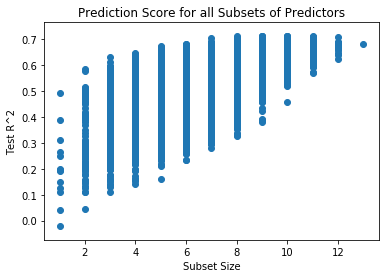

In [8]:
plot_values = []
for i in range(1,14):
    combi = list(combinations(range(13),i))
    for c in combi:
        c = list(c)
        lin_reg=LinearRegression()
        lin_reg.fit(X_train[:,c], y_train)
        plot_values.append([len(c), lin_reg.score(X_test[:,c],y_test)])
plot_values = pd.DataFrame(plot_values)
plt.scatter(plot_values.iloc[:,0], plot_values.iloc[:,1])
plt.xlabel('Subset Size')
plt.ylabel('Test R^2')
plt.title('Prediction Score for all Subsets of Predictors')
plt.show()

## 6) The file $\texttt{assay.csv}$ (available in the $\texttt{Westbc}$ folder on Canvas) contains gene expression data ($p=7,129$ genes) for $n=49$ breast cancer tumor samples. The file $\texttt{pheno.csv}$ contains a binary response variable for each sample (whether the sample tested positive or negative for cancer).

### (a) Split the dataset into a training and a test set. Use the training set to train a Lasso model to predict the response variable from the gene expression data. Use cross-validation.
### (b) Plot the cross-validation error curve (i.e., the average error as a function of the Lasso parameter $\alpha$).

In [455]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV

#### Splitting the dataset:

In [478]:
X = pd.read_csv('assay.csv')
y = pd.read_csv('pheno.csv')
X = X.transpose()
for i in range(49):
    if y.iloc[i,0] == 'negative':
        y.iloc[i,0] = -1
    else:
        y.iloc[i,0] = 1
X = np.array(X)
y = np.array(y)
y=y.reshape(49)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)

#### Training a Lasso model using cross validation, and plotting the error vs. the alpha parameter:

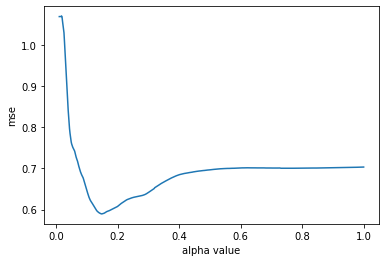

In [505]:
K=10
alphas = np.exp(np.linspace(np.log(0.01),np.log(1),1000))
num_alphas = len(alphas)

scores = np.zeros((num_alphas,1))

clf=LassoCV(alphas = alphas, cv = K)
clf.fit(X_train, y_train)    

scores_avg = clf.mse_path_.mean(axis = 1)

plt.plot(clf.alphas, scores_avg)
plt.xlabel('alpha value')
plt.ylabel('mse')
plt.show()

### (c) According to the Lasso, which genes appear to be good predictors for this type of cancer?

#### First, I find which alpha value gives the minimum error in the above graph:

In [506]:
min_error= np.argmin(scores_avg)
alpha_min = clf.alphas[min_error]
print('minimum alpha:', alpha_min)

minimum alpha: 0.147628147190939


#### Using that alpha, we find the non-zero coefficients of the Lasso model

In [507]:
lasso = Lasso(alpha = alpha_min)
lasso.fit(X_train, y_train)
print('the number of important genes:', np.count_nonzero(lasso.coef_))

genes = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        genes.append(i)
print('the important genes:', genes)

the number of important genes: 12
the important genes: [131, 981, 1234, 2330, 3003, 3262, 3500, 4171, 4372, 5489, 6074, 6427]


### (d) Fit a linear regression model using only the variables selected by the Lasso with the optimal parameter chosen by cross-validation. Compute the prediction error on your test set.

In [508]:
linreg = LinearRegression()
linreg.fit(X_train[:,genes], y_train)
test = np.zeros(len(X_test[:,genes]))
for l in range(len(test)):
    if linreg.predict(X_test[:,genes])[l] < 0:
        test[l]=-1
    else:
        test[l] = 1
correct = test == y_test
print(np.sum(correct))
print(len(correct))
print('the model was correct', (np.sum(correct)/len(correct))*100, 'percent of the time.')


8
13
the model was correct 61.53846153846154 percent of the time.


### (e) Repeat parts (a)-(d) using N=100 random train/test pairs. Compute the average prediction error on the test set and its standard deviation.

#### (I am changing the number of cross validation folds from 10 to 5 in order to reduce the computing time. It still takes about 15 minutes to run)

In [464]:
from random import  uniform
import time
from operator import truediv 

start_time = time.time()

X = pd.read_csv('assay.csv')
y = pd.read_csv('pheno.csv')
X = X.transpose()
for i in range(49):
    if y.iloc[i,0] == 'negative':
        y.iloc[i,0] = -1
    else:
        y.iloc[i,0] = 1
X = np.array(X)
y = np.array(y)
y=y.reshape(49)
N=100
total_correct = []
correct_percentage = []
alphas = np.exp(np.linspace(np.log(0.01),np.log(1),100))
num_alphas = len(alphas)
K=5


for j in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = uniform(.20, .50), random_state= None)
    scores = np.zeros((num_alphas,1))
    clf=LassoCV(alphas = alphas, cv = K)
    clf.fit(X_train, y_train)    
    scores_avg = clf.mse_path_.mean(axis = 1)
    min_error= np.argmin(scores_avg)
    alpha_min = clf.alphas[min_error]
    lasso = Lasso(alpha = alpha_min)
    lasso.fit(X_train, y_train)
    genes = []
    for i in range(len(lasso.coef_)):
        if lasso.coef_[i] != 0:
            genes.append(i)
    while genes == []: #to make sure I don't happen to pick a subset that gets rid of all coefficients 
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = uniform(.20, .50), random_state= None)
        scores = np.zeros((num_alphas,1))
        clf=LassoCV(alphas = alphas, cv = K)
        clf.fit(X_train, y_train)    
        scores_avg = clf.mse_path_.mean(axis = 1)
        min_error= np.argmin(scores_avg)
        alpha_min = clf.alphas[min_error]
        lasso = Lasso(alpha = alpha_min)
        lasso.fit(X_train, y_train)
        genes = []
        for i in range(len(lasso.coef_)):
            if lasso.coef_[i] != 0:
                genes.append(i)       
    linreg = LinearRegression()
    linreg.fit(X_train[:,genes], y_train)
    test = np.zeros(len(X_test[:,genes]))
    for l in range(len(test)):
        if linreg.predict(X_test[:,genes])[l] < 0:
            test[l]=-1
        else:
            test[l] = 1
    correct = test == y_test
    total_correct.append(np.sum(correct))
    correct_percentage.append(len(correct))

avg_total_correct = mean(total_correct)
avg_correct_percentage = mean(list(map(truediv, total_correct, correct_percentage)))
print('the average number of correct predictions:', avg_total_correct)
std = np.std(total_correct)
print('the standard deviation:', std)

print('the model was correct, on average,', (avg_correct_percentage)*100, 'percent of the time.')

print((time.time() - start_time)/60, 'minutes to run this code')

the average number of correct predictions: 11
the standard deviation: 2.91991438230644
the model was correct, on average, 66.10053424738915 percent of the time.
14.295729466279347 minutes to run this code


#### Implementing this sort of model seems to be accurate about 65% of the time, which isn't bad given the number of genes and the lack of samples.